In [144]:
import pandas as pd
import altair as alt
import numpy as np
from datetime import datetime

In [145]:
data = pd.read_csv("Geolocated Data - Sales & Prospect - 5.11.2023.csv")

# Drop all features that are common between the prospect and sales dataframes
df = data.drop(['id','FullAddress', 'StreetName', 'JobStatus', 'SalesRepName1', 'SalesRepName2', 'Accuracy.Score', 'Accuracy.Type'], axis = 1)

# Prospect is defined by not having a contract date
prospect = df[df.ContractDate.isnull()]
sales = df.dropna(subset = ['ContractDate'])

# Drop unused features
sales = sales.drop(['DateAdded', 'Issued', 'Sat'], axis = 1)
prospect = prospect.drop(['GrossAmount', 'ContractDate','Source'], axis = 1)

# Drop rows with incomplete data
prospect = prospect.dropna()

# Remove zip codes that are not 5 digits (certain entries were throwing exceptions when converting to int)
prospect = prospect[prospect['Zip'].str.contains(r'^\d{5}$')]

# Adjust the type of various columns
sales = sales.astype({'productid':"str",
                      'City':'str',
                      'State':'str',
                      'Source':'str',
                      'SubSource':'str',
                      'Zip':'int'})

prospect = prospect.astype({'productid':'str',
                            'City':'str',
                            'State':'str',
                            'SubSource':'str'})
                            #'Zip':'int'})

# Set date field to use the datetime type
sales['ContractDate'] = pd.to_datetime(df.ContractDate)
prospect['DateAdded'] = pd.to_datetime(df.DateAdded)


C:\Users\user\AppData\Local\Temp\ipykernel_8040\1604615305.py:1: DtypeWarning: Columns (3,9,10,11,12,15,16) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("Geolocated Data - Sales & Prospect - 5.11.2023.csv")


array([[<AxesSubplot:title={'center':'DateAdded'}>,
        <AxesSubplot:title={'center':'Latitude'}>],
       [<AxesSubplot:title={'center':'Longitude'}>, <AxesSubplot:>]],
      dtype=object)

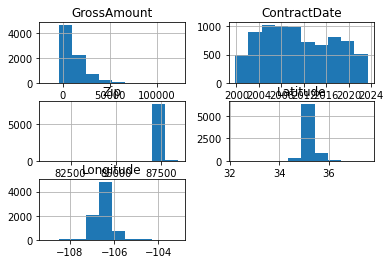

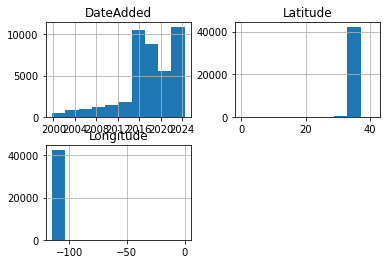

In [146]:
# Missing value handling


sales.hist()
prospect.hist()

In [147]:
print(sales.info())
sales.head()
#sales.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7854 entries, 0 to 7853
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   productid     7854 non-null   object        
 1   GrossAmount   7854 non-null   float64       
 2   ContractDate  7854 non-null   datetime64[ns]
 3   City          7854 non-null   object        
 4   State         7854 non-null   object        
 5   Zip           7854 non-null   int32         
 6   Source        7854 non-null   object        
 7   SubSource     7854 non-null   object        
 8   Latitude      7854 non-null   float64       
 9   Longitude     7854 non-null   float64       
dtypes: datetime64[ns](1), float64(3), int32(1), object(5)
memory usage: 644.3+ KB
None


,productid,GrossAmount,ContractDate,City,State,Zip,Source,SubSource,Latitude,Longitude
0,Bath,10144.0,2023-05-10,Albuquerque,NM,87123,Print,Valpak,35.057871,-106.495715
1,Bath,8738.0,2023-05-08,Albuquerque,NM,87122,Internet,Google,35.192038,-106.540850
2,Bath,10379.0,2023-05-05,Albuquerque,NM,87109,Print,Mailer - Bath,35.158152,-106.570980
3,Bath,9328.0,2023-05-04,Albuquerque,NM,87114,Internet,Google,35.213290,-106.668686
4,Bath,10764.0,2023-05-01,Albuquerque,NM,87112,Spectrum,FM - PPC Quote,35.104817,-106.540097


In [148]:
print(prospect.info())
prospect.head()
#prospect.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 42723 entries, 7854 to 54100
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   productid  42723 non-null  object        
 1   City       42723 non-null  object        
 2   State      42723 non-null  object        
 3   Zip        42723 non-null  object        
 4   SubSource  42723 non-null  object        
 5   DateAdded  42723 non-null  datetime64[ns]
 6   Issued     42723 non-null  object        
 7   Sat        42723 non-null  object        
 8   Latitude   42723 non-null  float64       
 9   Longitude  42723 non-null  float64       
dtypes: datetime64[ns](1), float64(2), object(7)
memory usage: 3.6+ MB
None


,productid,City,State,Zip,SubSource,DateAdded,Issued,Sat,Latitude,Longitude
7854,PC,Albuquerque,NM,87123,H&G Show,2000-05-01,True,True,35.059818,-106.523879
7855,PC,Albuquerque,NM,87123,Home Base,2000-05-01,True,True,35.084984,-106.489957
7856,PC,Albuquerque,NM,87120,H&G Show,2000-05-02,True,True,35.158232,-106.688017
7857,Sun,Albuquerque,NM,87106,H&G Show,2000-05-03,True,True,35.074063,-106.609919
7858,PC,Albuquerque,NM,87114,Home Builders Show,2000-05-08,True,True,35.210273,-106.695623
